
# House Price Prediction

# 1. 数据探索
## 1.1 文件
1. train.csv 训练集
2. test.csv 测试集
3. data_description.txt 每个column的细致描述
4. sample_submission.csv 提交样例，对每个房屋id，给出预测的salePrice

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

%matplotlib inline

## 1.2 简单探索
对数据的分布，缺失值等基本数据进行探究

In [74]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.head(2)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989


In [75]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [76]:
print("test shape:", test.shape)
print("train shape:", train.shape)

test shape: (1459, 80)
train shape: (1460, 81)


In [77]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

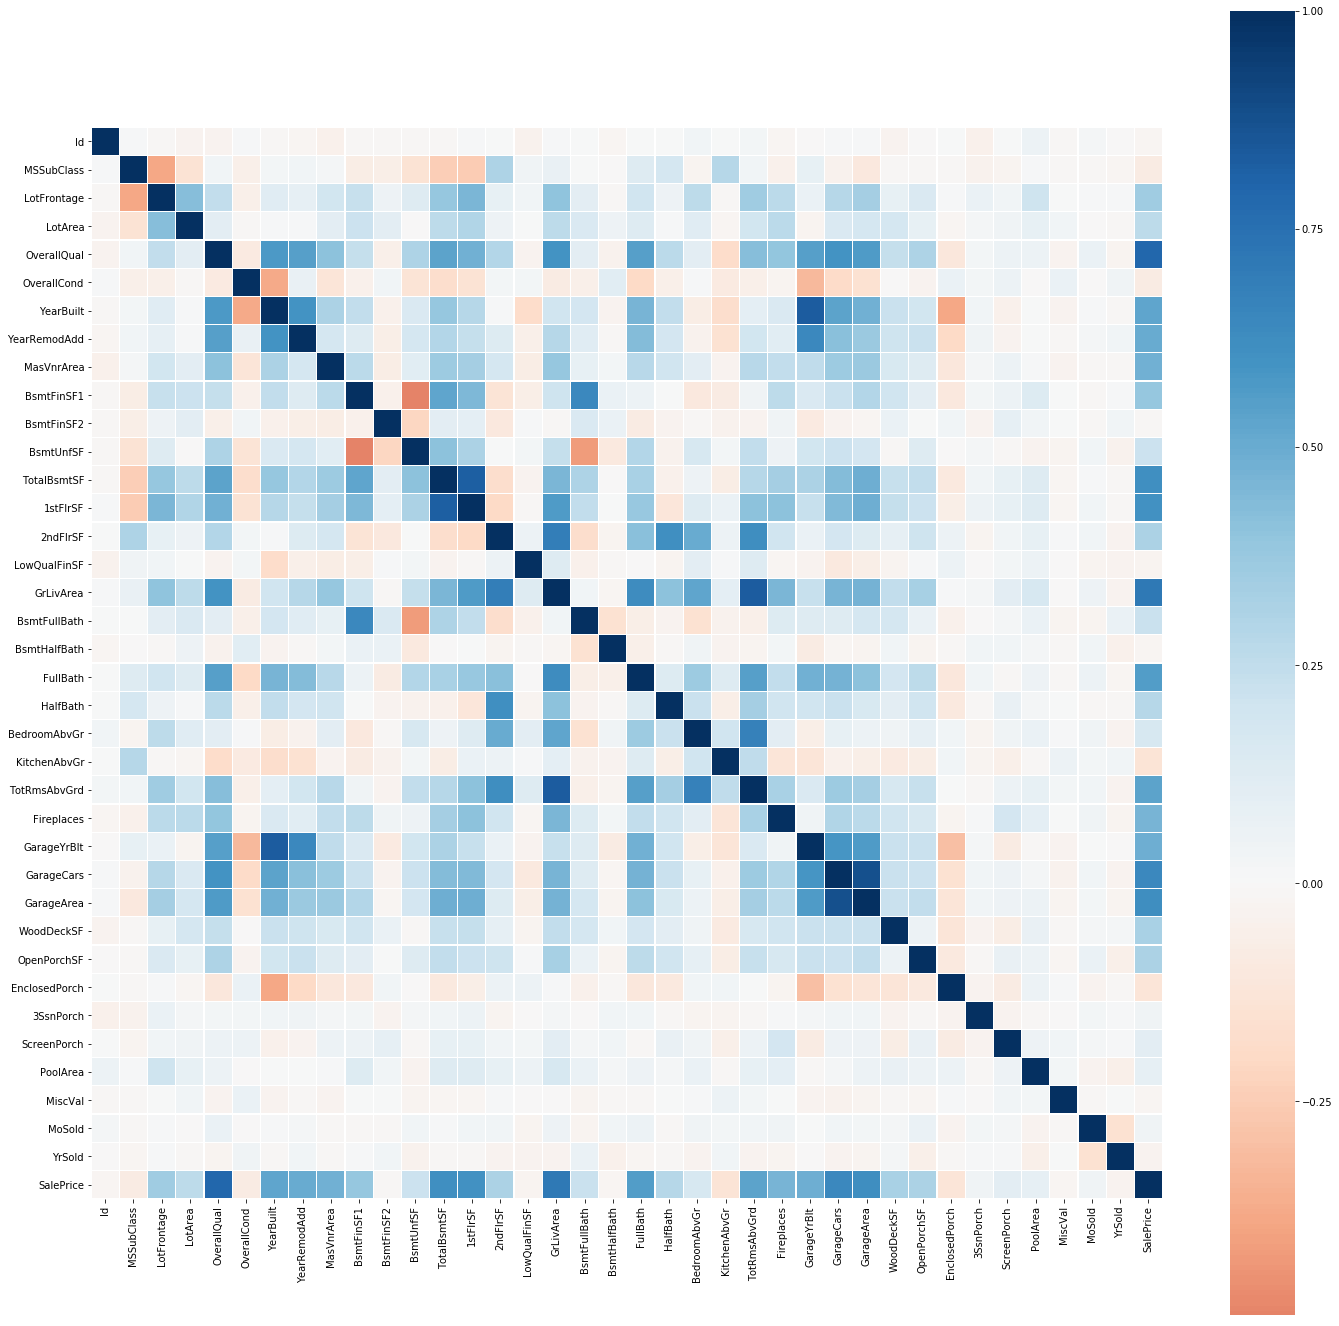

In [79]:
plt.figure(figsize=(24,24))
sns.heatmap(train.corr(), center=0,square=True,linewidths=.2, cmap=plt.cm.RdBu)

使用missingno lib将缺失值可视化

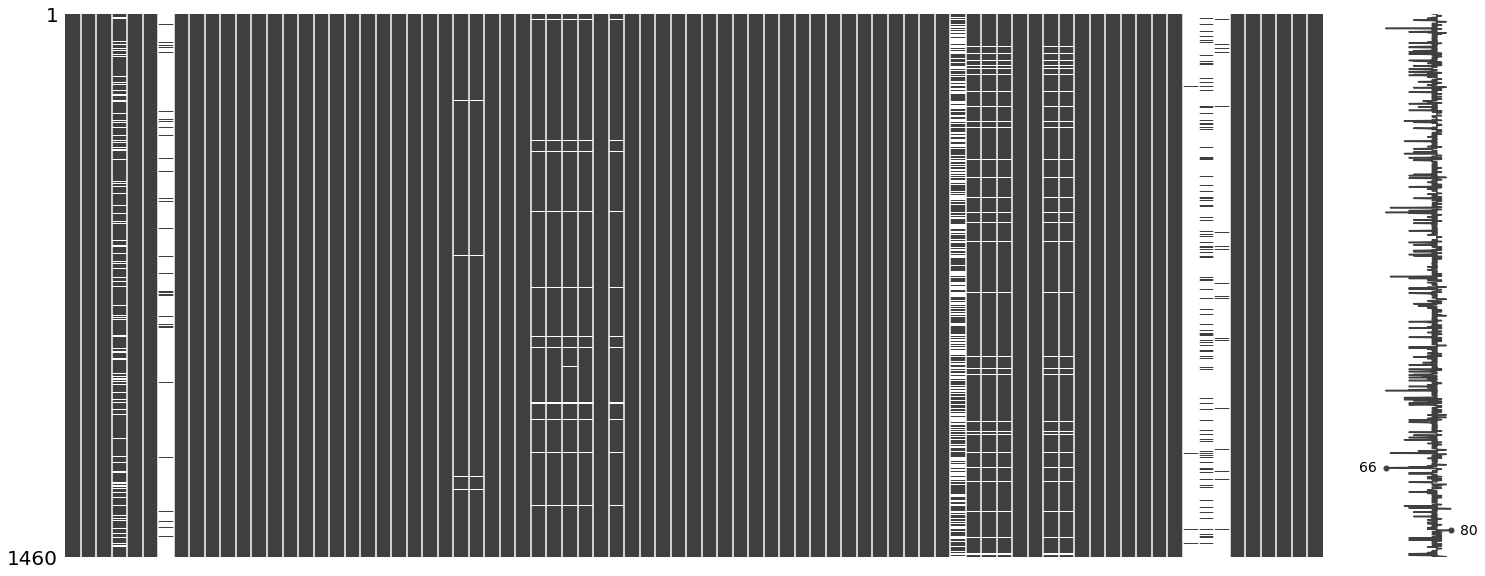

In [80]:
import missingno as msno
msno.matrix(train)

## 1.3 房价分布
首先查看一下预测target房价的分布

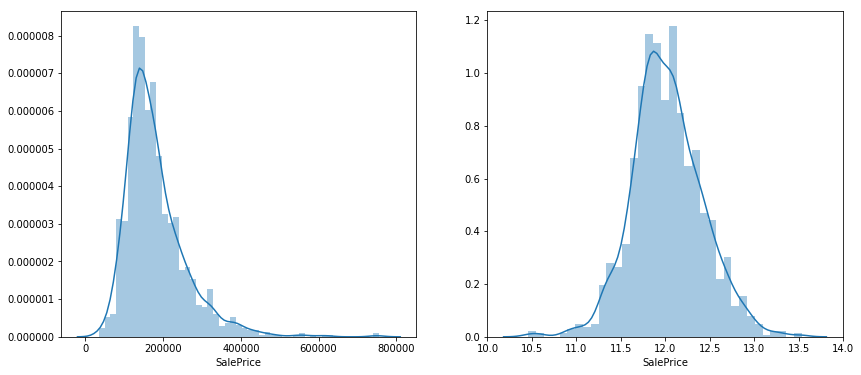

In [81]:
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(1,2,1)
sns.distplot(train.SalePrice)
ax2 = fig.add_subplot(1,2,2)
sns.distplot(np.log1p(train.SalePrice))

左边是原始的SalePrice的分布，可以看出来数据的分布是明显左偏的，将它取对数之后，如右图所示，就比较接近正态分布。

## 1.4 属性分析

首先，因为本问题的属性太多（80个），因此在这我们只对几个主要属性进行可视化。
- GrLivArea
- TotalBsmtSF
- GarageArea
- GarageCars
- YearBuilt
- CentralAir
- OverallQual
- Neighborhood
### 1.4.1 CentralAir 中央空调

In [82]:
train.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

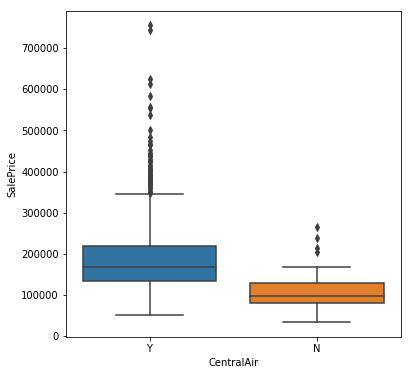

In [83]:
plt.figure(figsize=(6, 6))
sns.boxplot(train.CentralAir, train.SalePrice)

可以明显发现，有中央空调的房屋价格更高
### 1.4.2 属性：LotArea
属性：类似于一种面积

In [84]:
train.LotArea.dtype

dtype('int64')

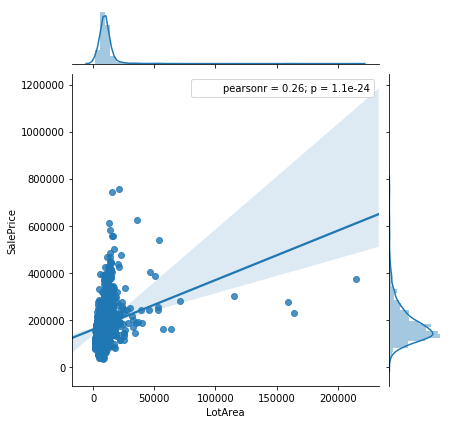

In [85]:
sns.jointplot(train.LotArea, train.SalePrice, kind='reg')

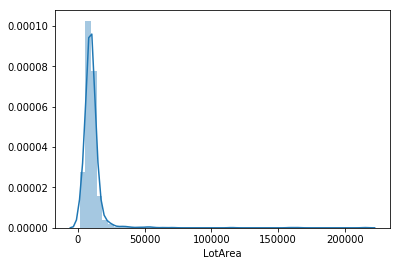

In [86]:
sns.distplot(train.LotArea)

初步观察，属性LotArea和房价没有特殊的线性关系，而且该房价也主要集中在0附近，不予保留。

### 1.4.3 Neighborhood

In [87]:
train.Neighborhood.dtype

dtype('O')

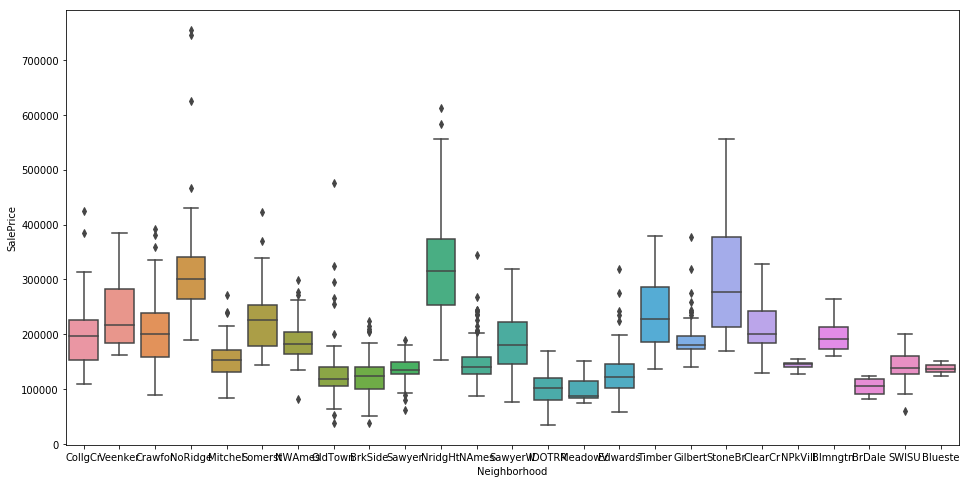

In [88]:
plt.figure(figsize=(16,8))
sns.boxplot(train.Neighborhood, train.SalePrice)

通过观察我们可以发现，不同的neighborhood对房价有不同的影响。
### 1.4.4 OverallQual总体评价

In [89]:
train.OverallQual.dtype

dtype('int64')

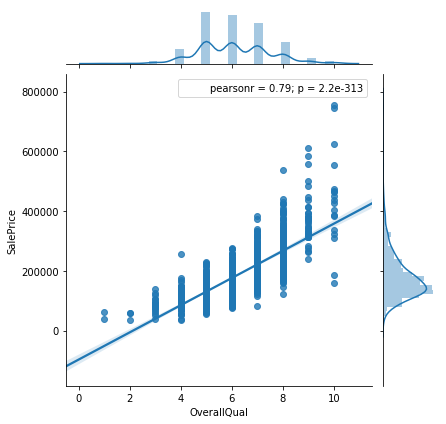

In [90]:
sns.jointplot(train.OverallQual,train.SalePrice, kind='reg')

OverallQual和房价呈正相关关系。
### 1.4.5 YearBuilt 建造年份

In [91]:
train.YearBuilt.dtype

dtype('int64')

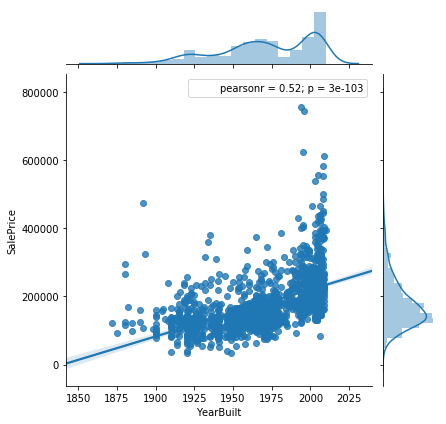

In [92]:
sns.jointplot(train.YearBuilt, train.SalePrice, kind='reg')

建造年份和房价呈现正相关

### 1.4.6 GrLivArea

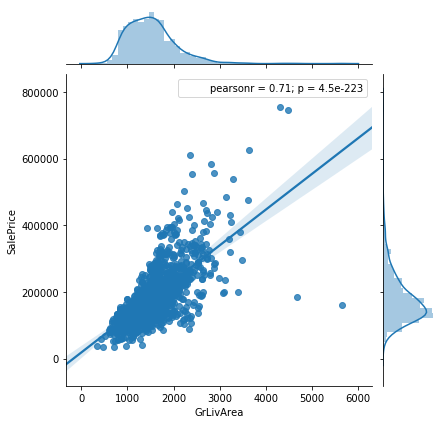

In [93]:
sns.jointplot(train.GrLivArea, train.SalePrice,kind='reg')

生活面积与房价有较大相关性。
### 1.4.7 TotalBsmtSF

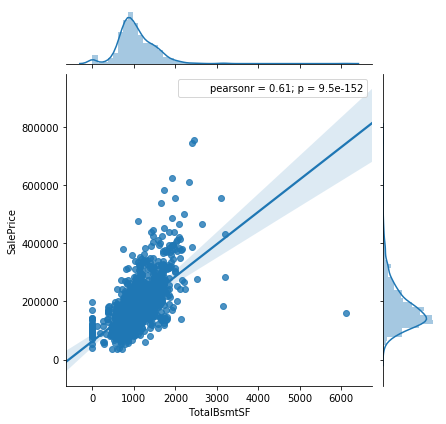

In [94]:
sns.jointplot(train.TotalBsmtSF, train.SalePrice, kind='reg')

该属性的意义是地下室面积，和房价呈现正相关

### 1.4.8 MiscVal

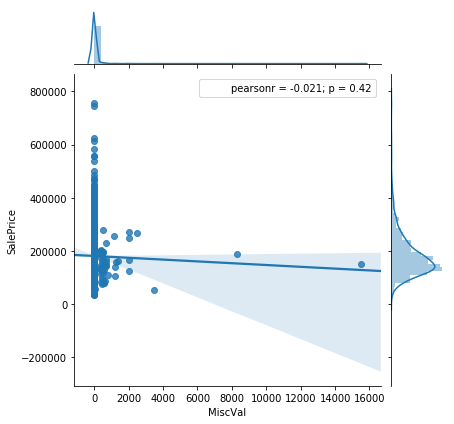

In [95]:
sns.jointplot(train.MiscVal, train.SalePrice, kind='reg')

如图，附加值对房价没有什么大的影响，顾不予考虑

### 1.4.9 GarageArea/GarageCars

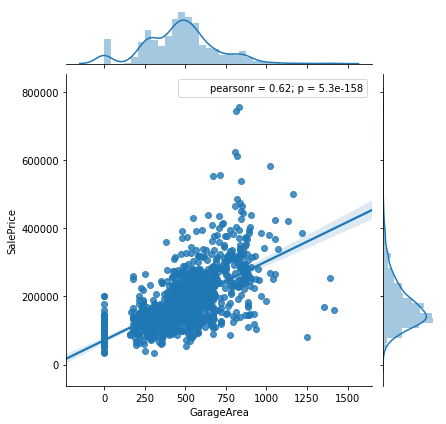

In [96]:
sns.jointplot(train.GarageArea, train.SalePrice, kind='reg')

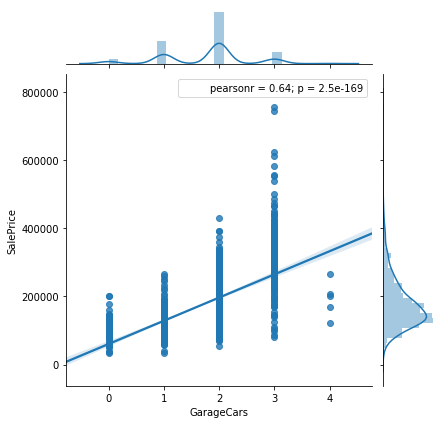

In [97]:
sns.jointplot(train.GarageCars, train.SalePrice, kind='reg')

由上图可知，房价和车库面积以及容纳车辆数呈现线性关系，所以保留。


# 2 特征工程
为了便于数据处理，我们将train和test数据集结合到一起

## 2.1 缺失值处理
首先看一下数据中缺失的情况：

In [98]:
features = pd.concat([train.drop(['SalePrice'], axis=1), test], keys=['train', 'test'])

In [99]:
features.isnull().sum()[features.isnull().sum()>0] #sum ==  2919

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

考虑到数值型数据和离散型数据的处理方式不同，所以我们将数据分割为数值型数据和对象型数据，然后分别对其进行处理

In [100]:
features_objects = [obj for obj in features.columns if (features[obj].dtype == 'object' and features[obj].isnull().sum()>0)]
features_numbers = [obj for obj in features.columns if (features[obj].dtype != 'object'and features[obj].isnull().sum()>0)]

### 使用字符标注缺失值
- 对于object类型的数据，使用字符"NA"进行缺失值标注填充。
- 同时，我们需要注意，数值型属性有两类，一类属性的取值是连续型数值，一类是用数值表示不同的分类，对于前者，我们需要使用统计数值进行填补（均值，众数等），对于后者，我们应将缺失值视为一个新的类型。

In [101]:
for feat in features_numbers:
    print(feat, features[feat].value_counts().count())

LotFrontage 128
MasVnrArea 444
BsmtFinSF1 991
BsmtFinSF2 272
BsmtUnfSF 1135
TotalBsmtSF 1058
BsmtFullBath 4
BsmtHalfBath 3
GarageYrBlt 103
GarageCars 6
GarageArea 603


如上所示，我们发现：“BsmtFullBath, BsmtHalfBath, GarageCars”虽然是number类型，但是取值种类非常少，说明该属性是用数值表示不同的类别，对于这三个将缺失值设为新的类别，其他的使用均值进行填补

In [102]:
features_temp = ["BsmtFullBath","BsmtHalfBath","GarageCars"]
for feat in features_temp:
    features[feat].fillna(-1, inplace=True)
for feat in features_objects:
    features[feat].fillna('NA', inplace=True)
#feature_numbers-features_temp
for feat in features_numbers:
    features[feat].fillna(features[feat].mean(), inplace=True)

## 2.2 添加新特征
另外添加了一个基于HouseStyle的特征，从上面HouseStyle的分布可以看出，已经建完的房子和没有建完的房子的售价是有差别的，所以我添加了一个特征来表示这个状态。

In [103]:
Unf=['2.5Unf','1.5Unf']
features["HouseStypeFinish"]=features["HouseStyle"].map(lambda x:0 if x in Unf else 1)

## 2.3 删除特征
删除掉属性：'Id'

In [104]:
features.drop(['Id'],axis=1,inplace=True)

## 3.4 数值特征转换类别特征
将数值特征转为类别特征，正如上述，有些数值特征和SalePrice没有明显的线性关系，所以将其转变为类别特征。

In [105]:
features.YrSold = features.YrSold.astype(str)
features.MoSold = features.MoSold.astype(str)
features.MSSubClass = features.MSSubClass.astype(str)
features.HalfBath = features.HalfBath.astype(str)
features.BedroomAbvGr = features.BedroomAbvGr.astype(str)
features.GarageCars = features.GarageCars.astype(str)

## 3.5 类别特征转换数值特征
将类别特征转为数值特征，与上述情况相反，有很多表示程度的属性与SalePrice有比较明显的线性关系，所以将其转为数值特征。

In [106]:
features = features.replace({"Alley" : {"NA":0,"Grvl" : 1, "Pave" : 2},
                 "BsmtCond" : {"NA":-1,"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                 "BsmtExposure" : {"NA":0,"No" : 1, "Mn" : 1, "Av": 2, "Gd" : 3},
                 "BsmtQual" : {"NA" : -1,"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                 "ExterCond" : {"NA" : -1,"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                 "ExterQual" : {"NA" : -1,"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                 "FireplaceQu" : {"NA" : -1,"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                 "Functional" : {"NA" : -1,"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                        "Min2" : 6, "Min1" : 7, "Typ" : 8},
                 "GarageCond" : {"NA" : -1,"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                 "GarageQual" : {"NA" : -1,"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                 "HeatingQC" : {"NA" : -1,"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                 "KitchenQual" : {"NA" : -1,"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                 "LandSlope" : {"NA" : -1,"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                 "LotShape" : {"NA" : -1,"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                 "PoolQC" : {"NA" : -1,"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                 "Street" : {"NA" : -1,"Grvl" : 1, "Pave" : 2}
                             })

## 3.6 one-hot编码和归一化

In [107]:
category_feats = features.dtypes[features.dtypes == "object"].index

for col in category_feats:
    for_dummy = features.pop(col)
    extra_data = pd.get_dummies(for_dummy,prefix=col)
    features = pd.concat([features, extra_data],axis=1)

In [108]:
from sklearn.preprocessing import RobustScaler
N = RobustScaler()
scale_features = N.fit_transform(features)

train_features = scale_features[:train.shape[0]]
test_features = scale_features[train.shape[0]:]

train_labels = train.SalePrice

# 4 训练模型

尝试多个模型后，选择效果较好的模型进行ensemble。  
为了方便观察每个模型的效果，先定义一个模型方便计算每个模型的交叉验证。

In [111]:
from sklearn.model_selection import cross_val_score
def rmse_cv(model, X_train, y):
    rmse = cross_val_score(model, X_train, y, cv=5)
    return rmse

print(train_features.shape)
print(test_features.shape)

In [112]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=700, max_depth=3, learning_rate=0.07,
                         subsample=0.9,colsample_bytree=0.7)
xgb_rmse = rmse_cv(xgb_model, train_features, train_labels)
print(xgb_rmse)
print("{:.5f}:+/-{:.5f}".format(xgb_rmse.mean(), xgb_rmse.std())) #90.18%

[0.92034074 0.84762348 0.90520182 0.88817453 0.89126943]
0.89052:+/-0.02429


In [113]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1,
                                      max_depth=3, min_samples_split=20,
                                      min_samples_leaf=5)
gbr_rmse = rmse_cv(gbr_model, train_features, train_labels)
print("{:.5f}:+/-{:.5f}".format(gbr_rmse.mean(), gbr_rmse.std())) #88.70%

0.87855:+/-0.03228


以上是两个集成模型xgboost和GBR，准确率分别为：90%和88%，接下来看一下线性模型： Elasticet, Lasso, Ridge, SVM模型。

测试模型的同时进行调参，并可视化学习曲线进而选择最优参数

[0.0001     0.00021544 0.00046416 0.001      0.00215443 0.00464159
 0.01       0.02154435 0.04641589 0.1       ]
[0.804192646537967, 0.8096445098797901, 0.8165617619128266, 0.8239039049271266, 0.8302053972239813, 0.8348124148468784, 0.838256317699306, 0.8407876258962886, 0.8416752913602537, 0.8398603596488424]


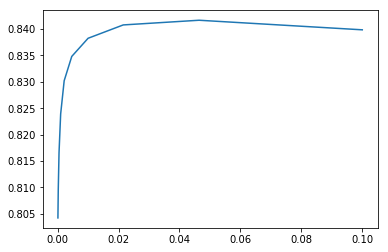

In [114]:
from sklearn.linear_model import ElasticNet

alphas = np.logspace(-4, -1, 10)
cv_elastic = [rmse_cv(ElasticNet(alpha=alpha), train_features, train_labels).mean() for alpha in alphas]
print(alphas)
print(cv_elastic)
cv_elastic = pd.Series(cv_elastic, index=alphas)
cv_elastic.plot()

可以看到对于ElasticNet来说，最优参数在0.0464左右，最高准确率为：83.93%

[1, 3, 5, 10, 15, 20, 30, 40, 50, 60]
[0.8284992966843825, 0.835317645495705, 0.8376241594512523, 0.8401544667839724, 0.841173148469807, 0.841587511850553, 0.8416117378718111, 0.8411564330102687, 0.8404946284708004, 0.8397346134449396]


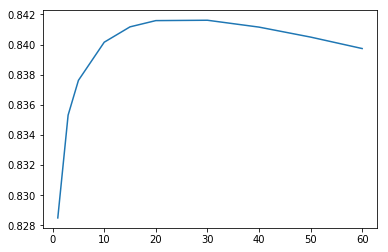

In [115]:
from sklearn.linear_model import Ridge

alphas=[1,3,5,10,15,20,30,40,50,60]
cv_ridge = [rmse_cv(Ridge(alpha=alpha), train_features, train_labels).mean() for alpha in alphas]
print(alphas)
print(cv_ridge)
cv_ridge = pd.Series(cv_ridge, index=alphas)
cv_ridge.plot()

可以看到，Ridge模型的最优参数为30，准确率为：83.93%

[1.00000000e-05 1.66810054e-05 2.78255940e-05 4.64158883e-05
 7.74263683e-05 1.29154967e-04 2.15443469e-04 3.59381366e-04
 5.99484250e-04 1.00000000e-03]
[0.8063071945923577, 0.806307232379425, 0.8063072951686159, 0.806307093965121, 0.8063066142010882, 0.8063058255677016, 0.8063045053998623, 0.8063022950613684, 0.8062985659264145, 0.8062922490610596]


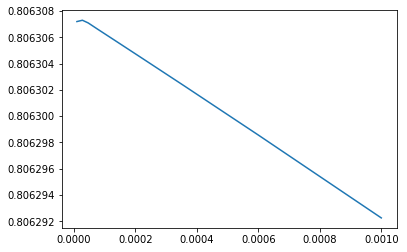

In [116]:
from sklearn.linear_model import Lasso

alphas = np.logspace(-5, -3, 10)
cv_lasso = [rmse_cv(Lasso(alpha=alpha), train_features, train_labels).mean() for alpha in alphas]
print(alphas)
print(cv_lasso)
cv_lasso = pd.Series(cv_lasso, index=alphas)
cv_lasso.plot()

[0.0001 0.0101 0.0201 0.0301 0.0401 0.0501 0.0601 0.0701 0.0801 0.0901]
[-0.05206581469718965, -0.036950418219280266, -0.03063327336738566, -0.02629450729526974, -0.025499286973903957, -0.02383221292670008, -0.02318912297144653, -0.02253264633182688, -0.02206606794616941, -0.02114090308659904]


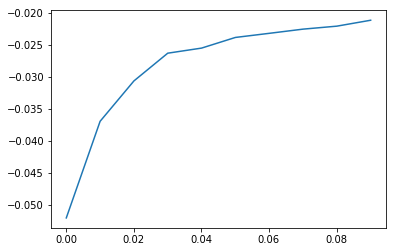

In [117]:
from sklearn.svm import SVR

svm_model = SVR()
Cs = np.arange(0.0001, 0.1,0.01)
cv_svm = [rmse_cv(SVR(C=c, kernel='linear'), train_features, train_labels).mean() for c in Cs]
print(Cs)
print(cv_svm)
cv_svm = pd.Series(cv_svm, index=Cs)
cv_svm.plot()

# Ensemble
对模型进行融合往往能有更好的效果，所以这里使用一个bagging的思想对训练好的几个模型进行ensemble

这里对每个模型加了一个权重，让效果更好的模型起到更大的作用，在上面的训练过程中，lasso的效果是最好的，所以它将有更大的权重。  
先来看一下每个模型在测试集上的效果。

Ridge(alpha=0.1114, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


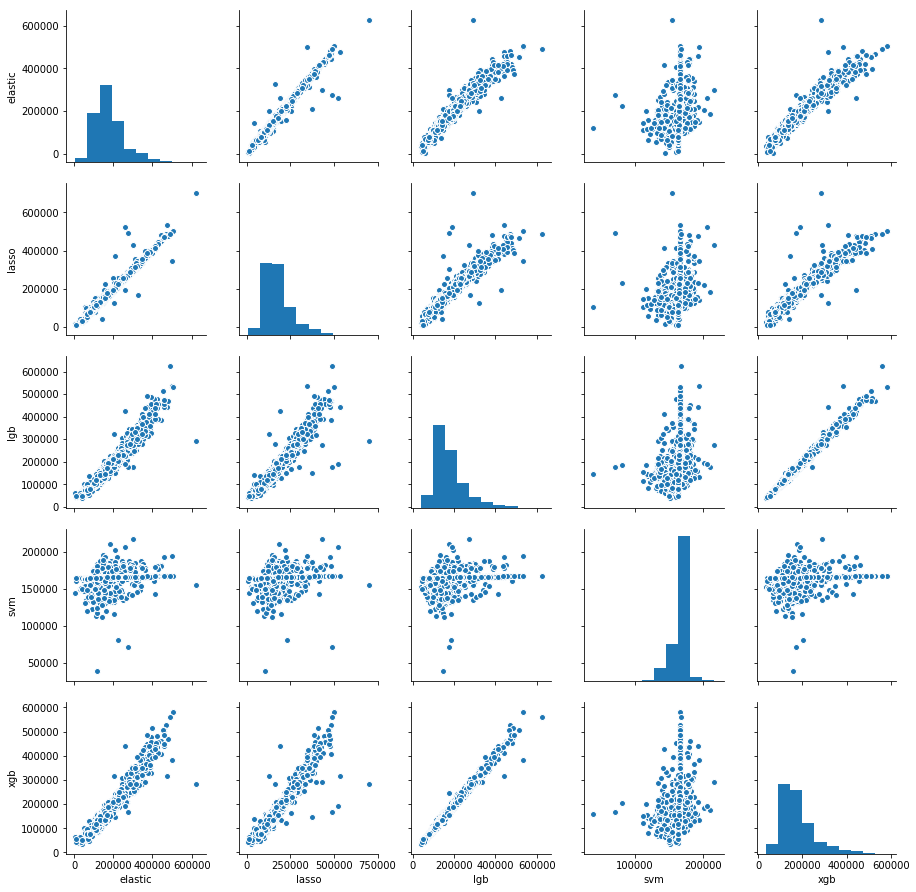

In [118]:
elastic_model = ElasticNet(alpha=0.001)
lasso_model = Lasso(alpha=0.1096)
ridge_model = Ridge(alpha=0.1114)
svm_model = SVR(C=0.1148,  kernel='linear')
xgb_model = XGBRegressor(n_estimators=700, max_depth=3, learning_rate=0.07,
                         subsample=0.9,colsample_bytree=0.7)
gbr_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1,
                                      max_depth=3, min_samples_split=20,
                                      min_samples_leaf=5)
print(ridge_model)
for model in [xgb_model,gbr_model,elastic_model,ridge_model,lasso_model,svm_model]:
    model.fit(train_features,train_labels)

xgb_pred = xgb_model.predict(test_features)
gbr_pred = gbr_model.predict(test_features)
elastic_pred = elastic_model.predict(test_features)
ridge_pred = ridge_model.predict(test_features)
lasso_pred = lasso_model.predict(test_features)
svm_pred = svm_model.predict(test_features)

preds = pd.DataFrame({"xgb":xgb_pred,"lgb":gbr_pred,"elastic":elastic_pred,"lasso":lasso_pred,"svm":svm_pred})

sns.pairplot(preds)

如图所示，虽然elastic的效果很好，但是它的预测结果就跟lasso差不多，所以给了lasso很高的权重之后，它的权重就不需要太高，而xgb和lgb的权重可以比elastic和svm高一些。所以这里我使用了[0.6,0.15,0.15,0.05,0.05]这样的权重，然后就可以来看一下融合的模型的效果了。

先定义一个AverageEnsemble的类，方便将ensemble的模型做与上面类似的融合。

In [119]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin,clone
from sklearn.model_selection import KFold
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models,weights):
        self.models = models
        self.weights = np.array(weights)
    
    def fit(self, X, y):
     #   self.models_ = [clone(x) for x in self.models]
       # for model in self.models_:
        for model in self.models:
       #     print(model)
            model.fit(X,y)
      #      print('ok')
        return self
    
    def predict(self,X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models
        ])
        return np.sum(self.weights*predictions, axis=1)

In [120]:
model_aver = AveragingModels(
  models=(xgb_model,gbr_model,elastic_model,ridge_model,lasso_model,svm_model),weights=(0.15,0.15,0.05,0.1,0.5,0.05))

# model_aver.fit(train_features, train_labels)
aver_rmse = rmse_cv(model_aver,train_features,train_labels)

print("{:.5f}:+/-{:.5f}".format(aver_rmse.mean(), aver_rmse.std()))

0.85755:+/-0.04840


In [121]:
model_aver.fit(train_features,train_labels)
pred_y = model_aver.predict(test_features)

#pred_y = np.expm1(pred_y_log)
pred_y[:10]

array([119101.83627601, 160094.10329212, 184422.23632673, 193123.59466337,
       197358.55529355, 171015.41758778, 172631.46093308, 159836.79881313,
       200828.98262   , 121607.75147137])

最后，将预测结果保留到本地，并提交到Kaggle

In [123]:
solution = pd.DataFrame({"id":test.Id,"SalePrice":pred_y})
solution.to_csv("result-2018-4-11.csv",index=False)